      Class# Set of animals:
      ====== ===============================================================
           1 (41) aardvark, antelope, bear, boar, buffalo, calf,
                  cavy, cheetah, deer, dolphin, elephant,
                  fruitbat, giraffe, girl, goat, gorilla, hamster,
                  hare, leopard, lion, lynx, mink, mole, mongoose,
                  opossum, oryx, platypus, polecat, pony,
                  porpoise, puma, pussycat, raccoon, reindeer,
                  seal, sealion, squirrel, vampire, vole, wallaby,wolf
           2 (20) chicken, crow, dove, duck, flamingo, gull, hawk,
                  kiwi, lark, ostrich, parakeet, penguin, pheasant,
                  rhea, skimmer, skua, sparrow, swan, vulture, wren
           3 (5)  pitviper, seasnake, slowworm, tortoise, tuatara 
           4 (13) bass, carp, catfish, chub, dogfish, haddock,
                  herring, pike, piranha, seahorse, sole, stingray, tuna
           5 (4)  frog, frog, newt, toad 
           6 (8)  flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
           7 (10) clam, crab, crayfish, lobster, octopus,
                  scorpion, seawasp, slug, starfish, worm

In [31]:
import pandas as pd

In [32]:
zoo_data = pd.read_csv("zoo_dataset.csv", names = ["animal", "hair", "feathers", "eggs", 
                                                   "milk", "airborne", "aquatic", "predator", 
                                                   "toothed", "backbone", "breathes", "venomous", 
                                                   "fins", "legs", "tail", "domestic", "catsize", "class" ])

In [33]:
zoo_data.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [34]:
features = zoo_data.columns[1:16].tolist()
print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic']


In [35]:
targets = zoo_data["class"].unique().tolist()
print(targets)

[1, 4, 2, 7, 6, 5, 3]


In [39]:
nonfeatures = zoo_data.columns[[0, 17]]
X = zoo_data.drop(nonfeatures, axis = 1).values
print(X.shape)

(101, 16)


In [40]:
y = zoo_data["class"]
print(y.head())

0    1
1    1
2    4
3    1
4    1
Name: class, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree1 = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 20, random_state = 3)

In [44]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [45]:
preds = tree1.predict(X_test)

In [46]:
from sklearn import metrics
print("Accurary of Entropy model: ", metrics.accuracy_score(y_test, preds))

Accurary of Entropy model:  0.8064516129032258


In [47]:
tree2 = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_split = 20, random_state = 3)

In [48]:
tree2.fit(X_train, y_train)
preds2 = tree2.predict(X_test)

In [49]:
print("Accurary of Entropy model: ", metrics.accuracy_score(y_test, preds2))

Accurary of Entropy model:  0.8064516129032258


In [50]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kf = KFold(X_train.shape[0], shuffle = True, random_state = 3)
print(np.mean(cross_val_score(tree2, X_train, y_train, cv = kf)))

0.8428571428571429


In [51]:
from sklearn.ensemble import RandomForestClassifier
tree3 = RandomForestClassifier(criterion = "entropy", n_estimators = 10)
tree3.fit(X_train, y_train)
preds3 = tree3.predict(X_test)
print("Accurary of Entropy model: ", metrics.accuracy_score(y_test, preds3))

Accurary of Entropy model:  0.967741935483871


In [52]:
print(np.mean(cross_val_score(tree3, X_train, y_train, cv = kf)))

0.9285714285714286


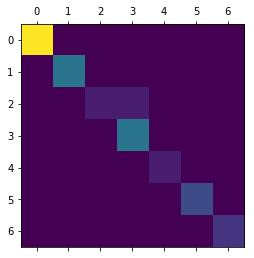

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, preds3)
plt.matshow(cm)